In [253]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# equilateral triangle





X = [[-0.5, -np.sqrt(3)*0.5/3], [0.5, -np.sqrt(3)*0.5/3], [0,np.sqrt(3)*0.5*2/3], [0, 0]]
X = np.array(X)

# create meshgrid
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
X_mesh = np.vstack((x1.flatten(), x2.flatten())).T

y = [10] * len(X)
y = np.array(y)
# y = np.random.randn(len(X)) * 10

(-1.0, 1.0)

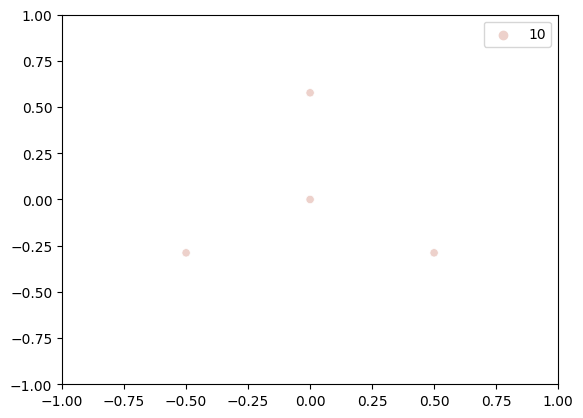

In [254]:
# scatter plot with seaborn limits -1,1
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.xlim(-1,1)
plt.ylim(-1,1)

In [255]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel
kernel = RBF(length_scale=0.5, length_scale_bounds='fixed') +  ConstantKernel(0, constant_value_bounds='fixed')
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X, y)
gaussian_process.kernel_

RBF(length_scale=0.5) + 0**2

<AxesSubplot: >

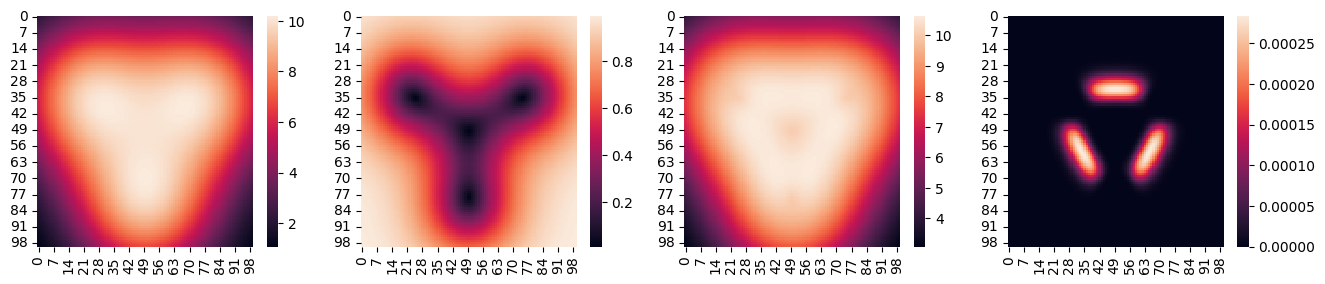

In [256]:
from scipy.stats import norm


y_mean, y_std = gaussian_process.predict(X_mesh, return_std=True)
y_mean = y_mean.reshape(x1.shape)
y_std = y_std.reshape(x1.shape)

mu_sample_opt = 10

xi = 1

imp = y_mean - mu_sample_opt - xi
Z = imp / y_std
ei = imp * norm.cdf(Z) + y_std * norm.pdf(Z)
ei[y_std == 0.0] = 0.0


# matplotlib multiplot
fig, ax = plt.subplots(1, 4, figsize=(16, 3))

sns.heatmap(y_mean, ax=ax[0])
sns.heatmap(y_std, ax=ax[1])
sns.heatmap(y_mean + 2 * y_std, ax=ax[2])
sns.heatmap(ei, ax=ax[3])

<AxesSubplot: >

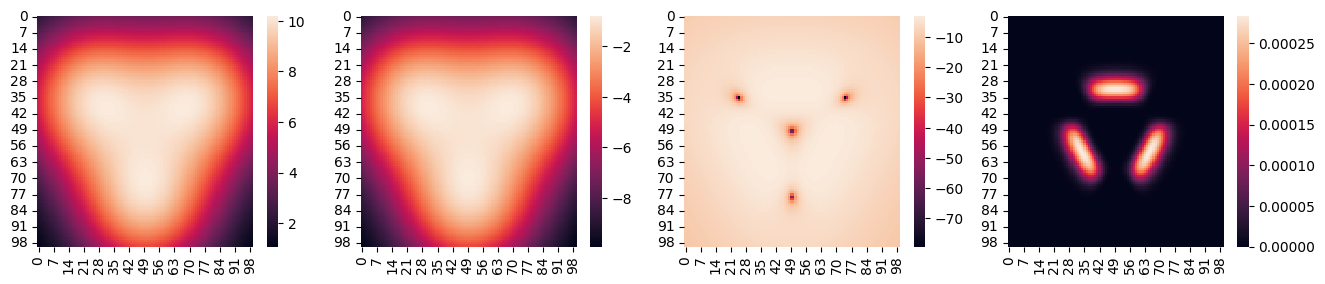

In [257]:
mu_sample_opt = 10

xi = 1

imp = y_mean - mu_sample_opt - xi
Z = imp / y_std
ei = imp * norm.cdf(Z) + y_std * norm.pdf(Z)
ei[y_std == 0.0] = 0.0


# matplotlib multiplot
fig, ax = plt.subplots(1, 4, figsize=(16, 3))

sns.heatmap(y_mean, ax=ax[0])
sns.heatmap(imp, ax=ax[1])
sns.heatmap(Z, ax=ax[2])
sns.heatmap(ei, ax=ax[3])